![](Completment_Face.png)

In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import LinearRegression,Ridge,Lasso

In [2]:
import sklearn.datasets as datasets

In [3]:
faces = datasets.fetch_olivetti_faces()
data = faces['data']
# 400个样本，4096个属性，像素点 = 64*64
data.shape

(400, 4096)

In [4]:
# 上半张脸
X = data[:,:2048]

# 下半张脸
y = data[:,2048:]

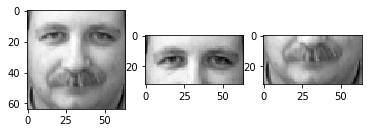

In [14]:
plt.figure(figsize=(6,2))

index = np.random.randint(0,400,size = 1)[0]

# 全脸
axes = plt.subplot(1,3,1)
axes.imshow(data[index].reshape(64,64),cmap = 'gray')

# 上半张脸
axes = plt.subplot(1,3,2)
axes.imshow(X[index].reshape(32,64),cmap = 'gray')

# 下半张脸
axes = plt.subplot(1,3,3)
axes.imshow(y[index].reshape(32,64),cmap = plt.cm.gray)

导包  
人脸数据fetch_olivetti_faces  
分别使用线性回归，岭回归，KNN，以及ExtraTrees回归进行分析

In [15]:
estimators = {}

estimators['Knn'] = KNeighborsRegressor(n_neighbors=5,weights='distance')

estimators['Linear'] = LinearRegression()

# L2正则化，损失函数上添加了w**2,目的缩减系数，防止过拟合
estimators['Ridge'] = Ridge(alpha=1)

# L1正则化，|w|
estimators['Lasso'] = Lasso(alpha=1)

生成训练数据和预测数据

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 20)

创建机器学习模型，以字典的形式包含四种模型

In [18]:
# estimator,估计，算法都是进行估计
# model模型，数学建模，model，表示算法
result_ = {}
for key,model in estimators.items():
    model.fit(X_train,y_train)
    
    y_ = model.predict(X_test)
    result_[key] = y_

使用模型训练数据并预测数据

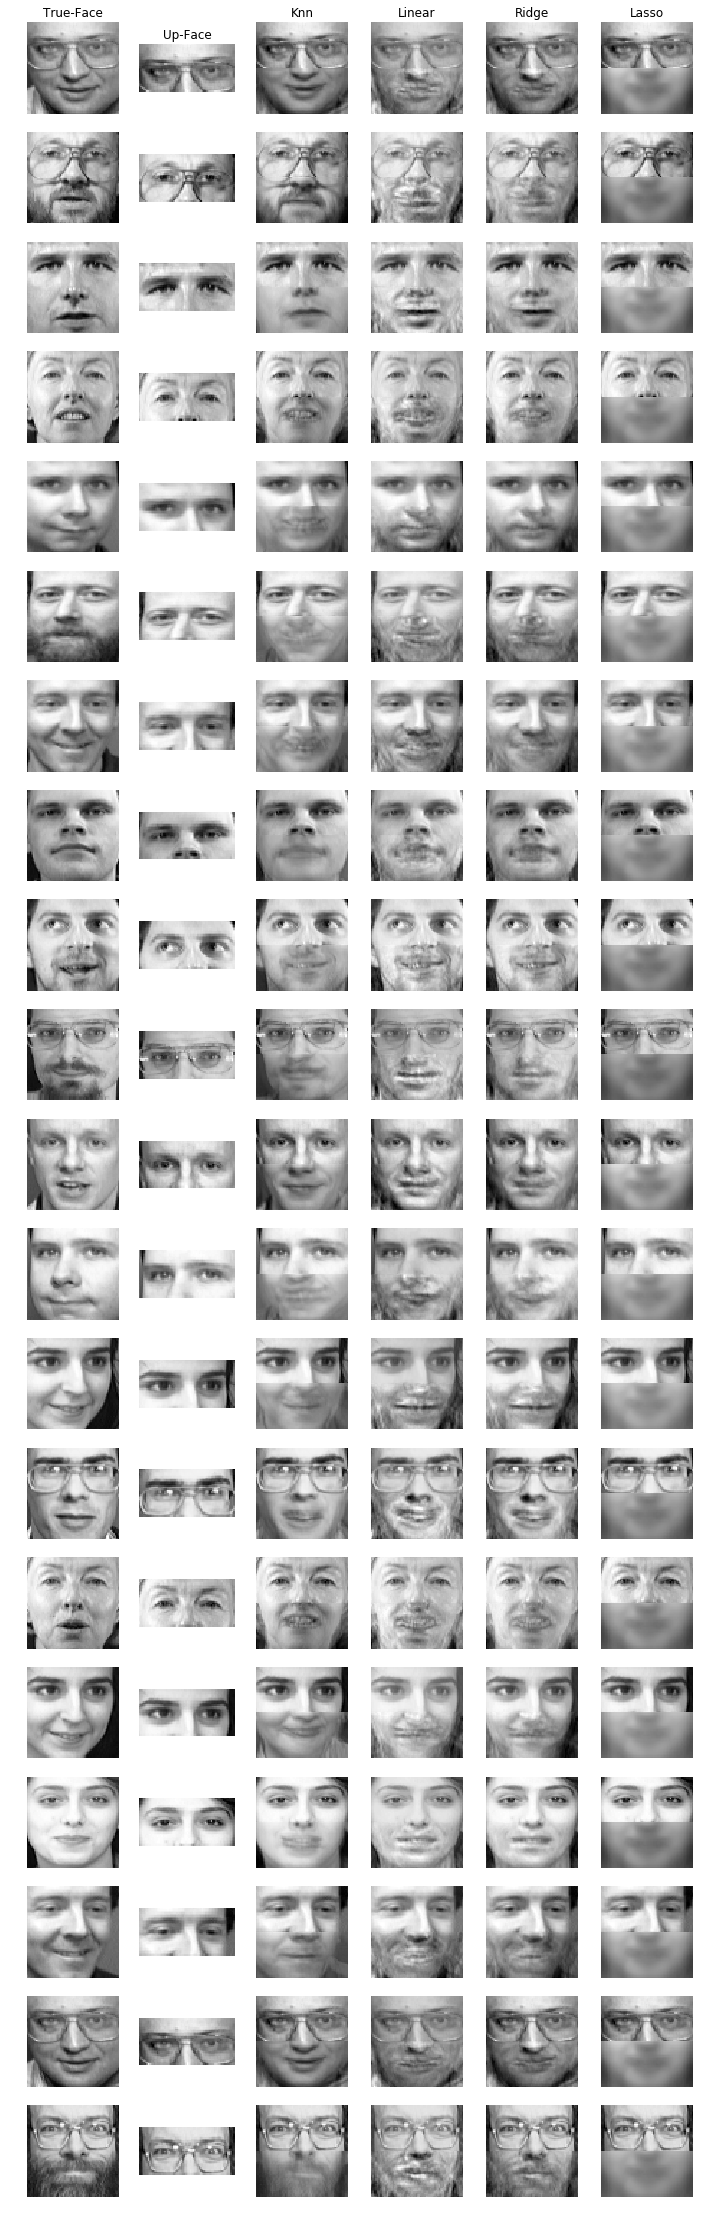

In [23]:
# 数据可视化，展示预测结果
plt.figure(figsize=(6*2,20*2))
for i in range(20):
    
#     第一列（全脸），第二列（半脸）
    axes = plt.subplot(20,6,i*6 + 1)
#     X_test(上半张) ------>y_test（下半张）一一对应
    face = np.concatenate([X_test[i],y_test[i]]).reshape(64,64)
    axes.imshow(face,cmap = 'gray')
    axes.axis('off')
    if i == 0:
        axes.set_title('True-Face')
    
    
    axes = plt.subplot(20,6,i*6 +2)
    axes.imshow(X_test[i].reshape(32,64),cmap = 'gray')
    axes.axis('off')
    if i == 0:
        axes.set_title('Up-Face')
#     三到六算法预测的全脸

#     数据在result_,算法预测出来的数据
#   j 0 ,1,2,3
    for j,key in enumerate(result_):
        y_ = result_[key]
        
        axes = plt.subplot(20,6,i*6 +3 + j)
        
        p_face = np.concatenate([X_test[i],y_[i]]).reshape(64,64)
        axes.imshow(p_face,cmap = 'gray')
        axes.axis('off')
        if i == 0:
            axes.set_title(key)